# **Week 10: Analysis of Variance (ANOVA)**

```
.------------------------------------.
|   __  ____  ______  _  ___ _____   |
|  |  \/  \ \/ / __ )/ |/ _ \___  |  |
|  | |\/| |\  /|  _ \| | | | | / /   |
|  | |  | |/  \| |_) | | |_| |/ /    |
|  |_|  |_/_/\_\____/|_|\___//_/     |
'------------------------------------'

```

In this workshop, we will focus on analysis of variance (ANOVA) techniques.

ANOVA is a family of statistical methods used to compare means across multiple groups and to understand how different factors contribute to variability in the data. We will explore:

- The fundamental ideas behind ANOVA.
- One-way and two-way ANOVA designs.
- Assumptions underlying these models.
- How to interpret results and post-hoc comparisons.
- Practical applications with real datasets.

## **Pre-Configurating the Notebook**

### **Switching to the R Kernel on Colab**

By default, Google Colab uses Python as its programming language. To use R instead, you’ll need to manually switch the kernel by going to **Runtime > Change runtime type**, and selecting R as the kernel. This allows you to run R code in the Colab environment.

However, our notebook is already configured to use R by default. Unless something goes wrong, you shouldn’t need to manually change runtime type.

### **Importing Required Packages**
**Run the following lines of code**:

In [2]:
#Do not modify

setwd("/content")

# Remove `MXB107-Notebooks` if exists,
if (dir.exists("MXB107-Notebooks")) {
  system("rm -rf MXB107-Notebooks")
}

# Fork the repository
system("git clone https://github.com/edelweiss611428/MXB107-Notebooks.git")

# Change working directory to "MXB107-Notebooks"
setwd("MXB107-Notebooks")

#
invisible(source("R/preConfigurated.R"))

Loading required package: ggplot2

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: tidyr

Loading required package: stringr

Loading required package: magrittr


Attaching package: ‘magrittr’


The following object is masked from ‘package:tidyr’:

    extract


Loading required package: IRdisplay

Loading required package: png

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘png’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: grid

Loading required package: knitr



**Do not modify the following**

In [3]:
if (!require("testthat")) install.packages("testthat"); library("testthat")

test_that("Test if all packages have been loaded", {

  expect_true(all(c("ggplot2", "tidyr", "dplyr", "stringr", "magrittr", "knitr") %in% loadedNamespaces()))

})

Loading required package: testthat


Attaching package: ‘testthat’


The following objects are masked from ‘package:magrittr’:

    equals, is_less_than, not


The following object is masked from ‘package:tidyr’:

    matches


The following object is masked from ‘package:dplyr’:

    matches




Test passed 🎊


## **One-Way ANOVA**

We will take a closer look at one-way ANOVA. The essence of two-way ANOVA is similar, although the formulas and interpretation are a bit more complex.


### **Formulation of One-Way ANOVA**

Consider a dataset $Y$ consisting of observations from $k$ **independent** groups.  
Let $Y_{ij}$ denote the $j$-th observation in group $i$, where $i = 1, \dots, k$ and $j = 1, \dots, n_i$.  

The one-way ANOVA model assumes that each observation can be modelled as:

$$
Y_{ij} = \mu_i + \varepsilon_{ij},
$$

where
- $\mu_i$: effect of group $i$
- $\varepsilon_{ij}$: random error, assumed $\sim \mathcal{N}(0, \sigma^2)$  

In this unit, for simplicity, $n_1 = n_2 = ⋯ = n_k$.

In one-way ANOVA, the goal is to test whether the means of all groups are equal.  This can be formalised as follows:

$$
H_0: \mu_1 = \mu_2 = \cdots = \mu_k\\
H_1: \text{At least one group mean differs from the others}
$$

- **Interpretation:**  
  - $H_0$ states that all group means are equal.  
  - $H_1$ states that at least one group mean differs from the others.

Note that two-sample t-test assuming equal variance is a special case of one-way ANOVA where $k = 2$. Moreover, this formulation assumes **equal population variance** across groups.



### **Decomposition of Total Sum of Squares (SSTOT)**

**NOTE:** In this unit, $n_1 = n_2 = ⋯ = n_k$.

Total variability in the data is:

$$
\text{SSTOT} = \sum_{i=1}^{k} \sum_{j=1}^{n_i} (Y_{ij} - \bar{Y}_{..})^2
$$

Where $\bar{Y}_{..}$ is the overall mean.  

It is possible to show that

$$
\text{SSTOT} = \text{SSTr} + \text{SSE}
$$

- **SSTr** = Treatment Sum of Squares, or sometimes called Between-group Sum of Squares (due to differences between group means)  
- **SSW** = Error Sum of Squares, or sometimes called Within-group Sum of Squares (variability within groups)

**Between-Group Sum of Squares (SSTr):**

$$
\text{SSTr} = \sum_{i=1}^{k} n_i (\bar{Y}_{i\cdot} - \bar{Y}_{..})^2
$$

- $n_i$ = number of observations in group $i$  
- $\bar{Y}_{i\cdot}$ = mean of group \(i\)  
- $\bar{Y}_{..}$ = overall mean  

**Within-Group Sum of Squares (SSE):**

$$
\text{SSE} = \sum_{i=1}^{k} \sum_{j=1}^{n_i} (Y_{ij} - \bar{Y}_{i\cdot})^2
$$


### **Essence of One-Way ANOVA**


Under the null hypothesis:

$$
H_0: \mu_1 = \mu_2 = \cdots = \mu_k\\
$$

- All group means are equal.
- In this case, **SSTr** will be relatively small compared to **SSE**, because the differences between group means are mostly due to random variation within groups.  
- **SSE** dominates the total variability.

When $H_0$ is **violated** (i.e., at least one pair of group means are different):  

- **SSTr** becomes large relative to **SSE**, because there is substantial variability due to differences between group means.  
- This situation motivates the use of the **F-test**, which compares SSTr and SSE.

**F-test rationale:**  

- Under $H_0$, the F-statistic:

$$
F = \frac{\text{MSTr}}{\text{MSE}} = \frac{\text{SSTr}/(k-1)}{\text{SSE}/(N-k)}
$$

is distributed according to an $F$ distribution with $(k-1, N-k)$ degrees of freedom ($F_{k-1, N-k}$).  
- If $H_0$ is violated, the observed $F$ statistic will be **large**, unlikely to occur under the null.  
- A large $F$ statistic provides **evidence to reject $H_0$**, indicating that not all group means are equal.

Unlike the t-test, which can be two-sided or one-sided, the F-test in ANOVA is **always a right-tailed test**.  This is because the F-statistic is a ratio of sums of squares (MSTr / MSE), which is **always non-negative**.  For example, take a look at the PDF of $F_{2,17}$


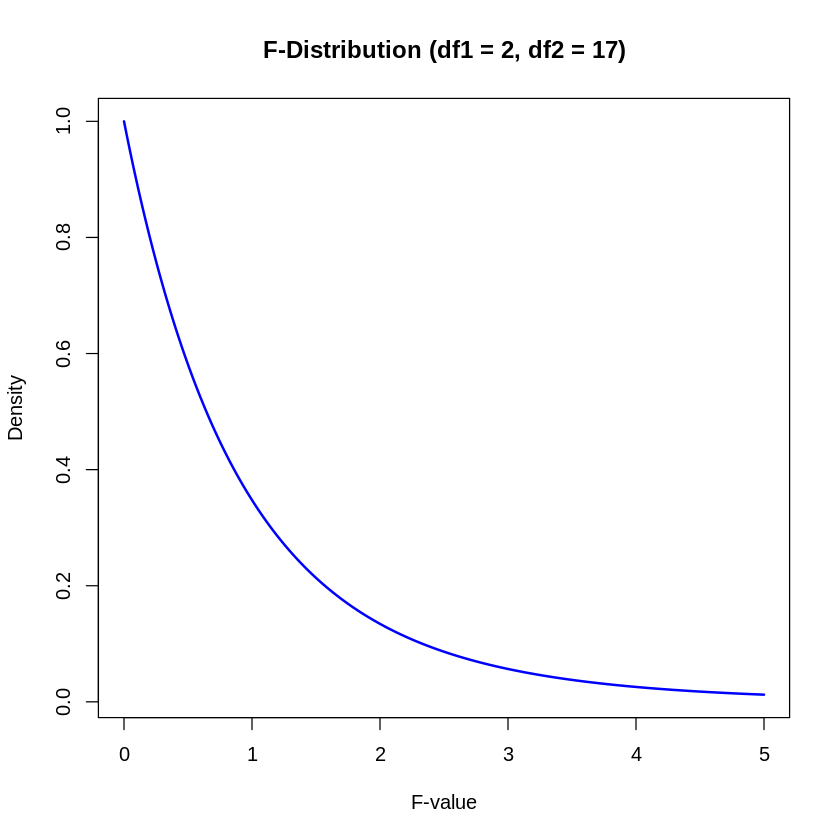

In [4]:
#F_{2,17}
vals = seq(0, 5, length.out = 500)
densities = df(vals, df1  = 2, df2 = 17)

# Plot
plot(vals, densities, type = "l", lwd = 2,
     main = "F-Distribution (df1 = 2, df2 = 17)",
     xlab = "F-value", ylab = "Density", col = "blue")

### **R Examples**

#### **R Quick Reference for F-Distribution**

Before we show how to run ANOVA in R, we will first discuss how to perform it manually.  This requires understanding and working with the $F$ distribution.


`R` supports the following functions for computing distributional quantities and simulating from $F$-distributions:

- `df(x, df1, df2, log = FALSE)` computes the **density** (PDF) of `F(df1, df2)` at `x`  
- `pf(q, df1, df2, lower.tail = TRUE, log.p = FALSE)` computes the **CDF** of `F(df1, df2)` at `q`  
- `qf(p, df1, df2, lower.tail = TRUE, log.p = FALSE)` computes the **p-quantile** of `F(df1, df2)`  
- `rf(n, df1, df2)` simulates `n` random numbers from an `F(df1, df2)` distribution


##### **Exercises**

The following dataset consists of three independent groups, each generated from a Gaussian distribution.

In [5]:

set.seed(123)
group1 = rnorm(5, 1)
group2 = rnorm(5,0)
group3 = rnorm(5,-1)

# Combine into long-format
df = data.frame(
  value = c(group1, group2, group3),
  group = factor(c(
    rep(1, length(group1)),
    rep(2, length(group2)),
    rep(3, length(group3))
  ))
)

df %>% head(10)


,value,group
,<dbl>,<fct>
1,0.4395244,1
2,0.7698225,1
3,2.5587083,1
4,1.0705084,1
5,1.1292877,1
6,1.7150650,2
7,0.4609162,2
8,-1.2650612,2
9,-0.6868529,2


###### **Exercise 1**

Verify the following identity:

$$
\text{SSTOT} = \text{SSTr} + \text{SSE}.
$$


<details>
<summary>▶️ Click to show the solution</summary>

```r
df %>%
  summarise(SSTOT = (n()-1)*var(value)) %>%
    pull(SSTOT) -> SSTOT
df %>%
  group_by(group) %>%
    summarise(groupAvg = mean(value), ni = n(), .groups = "drop") %>%
    summarise(SSTr = sum(ni * (groupAvg - mean(df$value))^2)) %>%
    pull(SSTr)  -> SSTr
df %>%
  group_by(group) %>%
  summarise(SSEi = (n()-1)*var(value), .groups = "drop") %>%
  summarise(SSE = sum(SSEi)) %>%
  pull(SSE) -> SSE

SSTOT
SSTr
SSE

all.equal(SSTOT, SSTr + SSE)
```

</details>

###### **Exercise 2**

Use ANOVA to *manually* test whether the group means are equal. Assume a 5% Type I error.


<details>
<summary>▶️ Click to show the solution</summary>

```r
# Hypotheses:
# H0: mu1 = mu2 = mu3
# H1: At least one mean is different

k = 3
n = nrow(df)
MSTr = SSTr/(k-1)
MSE = SSE/(n-k)
F_obs = MSTr/MSE #F_obs ~ F(k-1, n-k) under H0
F_obs
F_obs > qf(0.95, df1 = k-1, df2 = n-k) #unlikely under H0
#Evidence to reject the null hypothesis
```

</details>

###### **Exercise 3**

Rerun the previous code blocks several times under different scenarios:

- When the null hypothesis holds (all group means are equal).
- When the group means are moderately different (e.g., $\mu_1 = -1$, $\mu_2 = 0$, $\mu_3 = 1$.

- When the group means are very different (e.g., $\mu_1 = -5$, $\mu_2 = 0$, $\mu_3 = 5$.

What happens to the $F$ statistic and the rejection decision in each case?

In [8]:

set.seed(123)
group1 = rnorm(5, 5)
group2 = rnorm(5,0)
group3 = rnorm(5,-5)

# Combine into long-format
df = data.frame(
  value = c(group1, group2, group3),
  group = factor(c(
    rep(1, length(group1)),
    rep(2, length(group2)),
    rep(3, length(group3))
  ))
)

df %>% head(10)


,value,group
,<dbl>,<fct>
1,4.4395244,1
2,4.7698225,1
3,6.5587083,1
4,5.0705084,1
5,5.1292877,1
6,1.7150650,2
7,0.4609162,2
8,-1.2650612,2
9,-0.6868529,2



<details>
<summary>▶️ Click to show the solution</summary>

```r
group1 = rnorm(5, 5)
group2 = rnorm(5,0)
group3 = rnorm(5,-5)

# Combine into long-format
df = data.frame(
  value = c(group1, group2, group3),
  group = factor(c(
    rep(1, length(group1)),
    rep(2, length(group2)),
    rep(3, length(group3))
  ))
)

df %>%
  summarise(SSTOT = (n()-1)*var(value)) %>%
    pull(SSTOT) -> SSTOT
df %>%
  group_by(group) %>%
    summarise(groupAvg = mean(value), ni = n(), .groups = "drop") %>%
    summarise(SSTr = sum(ni * (groupAvg - mean(df$value))^2)) %>%
    pull(SSTr)  -> SSTr
df %>%
  group_by(group) %>%
  summarise(SSEi = (n()-1)*var(value), .groups = "drop") %>%
  summarise(SSE = sum(SSEi)) %>%
  pull(SSE) -> SSE

# Hypotheses:
# H0: mu1 = mu2 = mu3
# H1: At least one mean is different

k = 3
n = nrow(df)
MSTr = SSTr/(k-1)
MSE = SSE/(n-k)
F_obs = MSTr/MSE #F_obs ~ F(k-1, n-k) under H0
F_obs
```
As the deviation between group means becomes larger, we tend to observe more extreme $F$ statistics, providing stronger evidence against the null hypothesis. When the null hypothesis is true, $F$ values are generally small.

</details>

#### **ANOVA in R via `aov`**

R provides a dedicated function for performing ANOVA: the `aov()` function. It has a formula interface, similar to `t.test()`, `lm()`, and many other functions used in statistical modeling in R. However, `aov()` is not the only way to perform ANOVA in R. You can also use `lm()`, since ANOVA is a special case of (multiple) linear regression models.

**Usage:**

```r
aov(formula,
    data = NULL,
    projections = FALSE,
    qr = TRUE,
    contrasts = NULL,
    ...)
```

**Arguments:**

- `formula`: a model formula of the form `response ~ predictors` (e.g., `y ~ group`)  
- `data`: a data frame containing variables in the model  
- `projections`: logical; if TRUE, returns projection matrices  
- `qr`: logical; if TRUE, returns the QR decomposition of the model fit  
- `contrasts`: a list of contrast specifications for factors  
- `...`: additional arguments passed to `lm()`  



Back to the previous simulated dataset:

In [9]:

set.seed(123)
group1 = rnorm(5, 1)
group2 = rnorm(5,0)
group3 = rnorm(5,-1)

# Combine into long-format
df = data.frame(
  value = c(group1, group2, group3),
  group = factor(c(
    rep(1, length(group1)),
    rep(2, length(group2)),
    rep(3, length(group3))
  )),
  groupInt = c(
    rep(1, length(group1)),
    rep(2, length(group2)),
    rep(3, length(group3))
  )
)

df %>% head(10)


,value,group,groupInt
,<dbl>,<fct>,<dbl>
1,0.4395244,1,1
2,0.7698225,1,1
3,2.5587083,1,1
4,1.0705084,1,1
5,1.1292877,1,1
6,1.7150650,2,2
7,0.4609162,2,2
8,-1.2650612,2,2
9,-0.6868529,2,2


Note that the datatype of `group` is not integer, but factor. This means it should be treated as a categorical variable rather than a numeric one. This distinction is important for ANOVA because if group were treated as an integer, the model would interpret the group IDs (e.g., 1, 2, 3) as numeric values with a meaningful order or magnitude, rather than as mere labels representing different categories. Using a factor ensures that ANOVA correctly compares group means.

In [10]:
aov(value ~ group, data = df) %>% summary()

            Df Sum Sq Mean Sq F value Pr(>F)  
group        2  9.180   4.590   5.689 0.0183 *
Residuals   12  9.682   0.807                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

`aov()` by default generates a **statistical summary**, which includes:

- $F$-statistic: the value of the test statistic for the ANOVA  
- Degrees of freedom (Df): for the $F$-distribution under the null hypothesis  
- Sum of Squares (Sum Sq): total variation attributed to each source (between groups vs within groups/residual)  
- Mean Squares (Mean Sq): average variation per degree of freedom (Sum Sq / Df)  
- p-value (Pr(>F)): the probability of observing a value as extreme (or more extreme) than the observed $F$ statistic, assuming the null hypothesis is true  
  - If the **p-value is smaller than the significance level** $\alpha$, it is equivalent to rejecting the null hypothesis in the Neyman-Pearson framework. Useful for deciding whether group means differ significantly!


ANOVA is a special case of a linear regression model where the regressors are categorical. One can also use the `lm()` function to run ANOVA and then apply `anova()` on the `lm` object to extract the results.  Details about the mathematics behind this approach are beyond the scope of this unit.


In [11]:
lm(value ~ group, data = df) %>% anova()

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
group,2,9.179556,4.5897780,5.68892,0.018292
Residuals,12,9.681511,0.8067925,NA,NA


**Be cautious!!!**

If one forgets to convert `group` to a factor when it is numeric and performs ANOVA, this can lead to different results. In this case, ANOVA will treat `group` as a numeric predictor and fit a linear model where `value` depends linearly on `group`, rather than comparing group means. This can produce misleading conclusions.

For example, in `df`, we have `groupInt`, which stores group IDs as integers.

In [12]:
aov(value ~ groupInt, data = df) %>% summary()

            Df Sum Sq Mean Sq F value Pr(>F)   
groupInt     1  8.889   8.889   11.59 0.0047 **
Residuals   13  9.972   0.767                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [13]:
anova(lm(value ~ groupInt, data = df))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
groupInt,1,8.889365,8.889365,11.58897,0.00470369
Residuals,13,9.971702,0.767054,NA,NA


#### **Pair-wise Comparision**

After performing a one-way ANOVA, if the null hypothesis is rejected, one might be tempted to conduct **pairwise comparisons** between all groups to determine which specific means differ. For $k$ groups, there are $\frac{k(k-1)}{2}$ possible pairwise comparisons. Each comparison can be formulated as a standard two-sample t-test:

$$
t = \frac{\bar{X}_i - \bar{X}_j}{\sqrt{s_p^2 \left(\frac{1}{n_i} + \frac{1}{n_j}\right)}},
$$

where $s_p^2$ is the pooled variance and $n_i$, $n_j$ are the sample sizes of groups $i$ and $j$. However, performing multiple t-tests **inflates the type I error rate**, because each test has a probability of incorrectly rejecting the null, and the more tests performed, the higher the overall chance of making at least one false positive. This is why adjustments such as Tukey's HSD, Bonferroni correction, or other multiple testing procedures are recommended after ANOVA to control the **family-wise error rate** — that is, the probability of incorrectly rejecting at least one pairwise comparison hypothesis when the original null hypothesis is true:

$$
H_0: \mu_1 = \mu_2 = \dots = \mu_k = 0.
$$

Of course, if one is solely interested in testing whether all group means are equal, it is more appropriate to test them **simultaneously** using the overall F-test from ANOVA, rather than performing multiple pairwise comparisons.


We focus on the practical implementation of Tukey's HSD. It is straightforward: one only needs to pipe an `aov` object to the `TukeyHSD()` function to perform all pairwise comparisons with appropriate adjustment for multiple testing.



In [14]:
aov(value ~ group, data = df) %>% TukeyHSD()

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = value ~ group, data = df)

$group
          diff       lwr        upr     p adj
2-1 -1.2378892 -2.753454  0.2776758 0.1155094
3-1 -1.8856685 -3.401234 -0.3701035 0.0156275
3-2 -0.6477793 -2.163344  0.8677857 0.5089623


There are several ways to interpret the output of `TukeyHSD()`. One handy approach is to look at the **adjusted p-values** (though this is not covered in detail in this unit). If the adjusted p-value is smaller than the chosen type I error rate $\alpha$, we can reject the null hypothesis that the two group means are equal.  

Another approach is to examine the `lwr` and `upr` columns. These represent confidence intervals for the differences between group means. If a confidence interval does **not** include 0, it is equivalent to rejecting the null hypothesis that the two group means are equal, thanks to the connection between hypothesis testing and confidence intervals.

For example, in our example, we reject the null hypothesis that $\mu_1 = \mu_3$ and do not reject the null hypotheses $\mu_1 = \mu_2$ and $\mu_2 = \mu_3$.


##### **Exercise**

The `PlantGrowth` dataset contains the weight of plants under three different treatment groups (`ctrl`, `trt1`, `trt2`).

- Use the `aov()` function in R to test whether there is a significant difference in mean plant weight among the three groups.
- Interpret the ANOVA table and determine whether the null hypothesis of equal group means can be rejected.
- Perform an appropriate method for pairwise comparisons between the groups.

Assume a 5% Type I error.


In [15]:
PlantGrowth %>% str()

'data.frame':	30 obs. of  2 variables:
 $ weight: num  4.17 5.58 5.18 6.11 4.5 4.61 5.17 4.53 5.33 5.14 ...
 $ group : Factor w/ 3 levels "ctrl","trt1",..: 1 1 1 1 1 1 1 1 1 1 ...



<details>
<summary>▶️ Click to show the solution</summary>

```r
aov(weight~group, PlantGrowth) %>% summary()
F_val = 0.0159
F_val > qf(0.95,2,27)
```
As $F$ statistic is larger than `qf(0.95, 2,27)`, we reject the null hypothesis that there is no difference in mean plant weight between the 3 interventions in favour of the alternative hypothesis.


```r
aov(weight~group, PlantGrowth) %>% TukeyHSD()
```
Pairwise comparisons using the TukeyHSD method suggest that there is **no evidence** against the null hypothesis for `trt2 - ctrl` and `trt1 - trt2` (their mean differences are not statistically significant). However, there **is evidence** that `trt1` and `ctrl` lead to different mean plant weights.

**Note:**  

Even if we find  
- no statistical evidence for a difference between A and B, and  
- no statistical evidence for a difference between A and C,  

this does **not** mean there is no statistical difference between B and C.  

For example, it could be that B has a slightly higher mean than A, and C has a slightly lower mean than A. Each difference might be too small for a t-test to detect individually. However, when comparing B and C directly, the differences "add up," making it easier to detect a statistically significant difference.


</details>

## **Two-Way ANOVA**



### **Formulation of Two-Way ANOVA**
We will not go into two-way ANOVA in as much detail as one-way ANOVA, but the idea is a natural extension. Here, instead of having only one treatment variable, we now allow for two treatment variables (factors). Their essenses are pretty much the same, though.

Suppose we have two factors, **A** with $I$ levels and **B** with $J$ levels. The two-way ANOVA model is:  

$$
Y_{ijk} = \alpha_i + \beta_j + (\alpha\beta)_{ij} + \varepsilon_{ijk},
$$  

where:  
- $\alpha_i$: effect of the $i$-th level of factor A  
- $\beta_j$: effect of the $j$-th level of factor B  
- $(\alpha\beta)_{ij}$: **interaction effect** between level $i$ of A and level $j$ of B  
- $\varepsilon_{ijk} \sim \mathcal{N}(0, \sigma^2)$: random error term  

Sometimes the interaction is not included in the model. However, if interactions are present and significant, they fundamentally change how we interpret the effects of the factors. In particular:

- If the interaction term is **not significant**, the effect of one factor is consistent across the levels of the other factor.  
- If the interaction term is **significant**, the effect of one factor depends on the level of the other factor (the two factors do not act independently).  

#### **Hypothesis Testing for Two-Way ANOVA**
  

In two-way ANOVA, we are interested in testing the following hypotheses:

- **Main effect of factor A:**  
  $$
  H_0^A: \alpha_1 = \alpha_2 = \dots = \alpha_I\\
  H_1^A: \text{At least one } \alpha_i \text{are different from the others}
  $$  

- **Main effect of factor B:**  
  $$
  H_0^B: \beta_1 = \beta_2 = \dots = \beta_J\\
  H_1^B: \text{At least one } \beta_j\text{are different from the others}
  $$  

- **Interaction effect:**  
  $$
  H_0^{AB}: (\alpha\beta)_{ij} = 0 \quad \text{for all } i,j\\
  H_1^{AB}: \text{At least one interaction term is non-zero}
  $$  

Below is a typical ANOVA table obtained from statistical software (e.g., `R`) for two-way ANOVA.

| Source       | Degrees of Freedom | Sum of Squares | Mean Squares             | F             |
|-------------|------------------|----------------|-------------------------|---------------|
| A           | I - 1            | SSA            | SSA / (I - 1)           | MSA / MSE     |
| B           | J - 1            | SSB            | SSB / (J - 1)           | MSB / MSE     |
| A × B       | (I - 1)(J - 1)   | SSAB           | SSAB / ((I - 1)(J - 1)) | MSAB / MSE    |
| Error       | IJ(K - 1)        | SSE            | SSE / (IJ(K - 1))       |               |
| Total       | IJK - 1          | SST            |                         |               |

The $F$-test for a factor (e.g., factor A) is performed by comparing the mean square of that factor (`MSA`) with the mean square of error (`MSE`) using the corresponding degrees of freedom:

$$
F_A = \frac{MSA}{MSE},
$$


with $\textit{df}_1 = I-1$, $\textit{df}_2 = IJ(K-1)$.



### **Randomised Complete Block Design (RCBD)**

A **block design** is a special case of two-way ANOVA, where one factor is the **treatment of interest** and the other factor is a **blocking factor** (a nuisance variable) used to control for variability across experimental units.

Suppose we have:  
- Treatments: factor A with $I$ levels  
- Blocks: factor B with $J$ levels  
- One replicate per treatment within each block (standard RCBD).

The model is:

$$
Y_{ij} = \tau_i + \beta_j + \varepsilon_{ij},
$$

where:   
- $\tau_i$: effect of the $i$-th treatment (factor of interest)  
- $\beta_j$: effect of the $j$-th block (blocking factor)  
- $\varepsilon_{ij} \sim \mathcal{N}(0, \sigma^2)$: random error term  

**Notes:**

- There is **no interaction term**.
- Including blocks in the model reduces residual variability, making it easier to detect treatment effects.  
- The **null hypothesis** for treatments:

$$
H_0: \tau_1 = \tau_2 = \dots = \tau_I
$$

- The **null hypothesis** for blocks:

$$
H_0: \beta_1 = \beta_2 = \dots = \beta_J
$$

Interpretation of ANOVA output is the same as in one-way or two-way ANOVA. Below is a typical ANOVA table obtained from statistical software (e.g., `R`) for RCBD.

| Source       | Sum of Squares | Degrees of Freedom | Mean Square       | F                  |
|-------------|----------------|-----------------|-----------------|------------------|
| Block       | SSB            | J - 1           | SSB / (J - 1)   | MSB / MSE        |
| Treatment   | SSTr           | I - 1           | SSTr / (I - 1)  | MSTr / MSE       |
| Error       | SSE            | (I - 1)(J - 1)  | SSE / ((I - 1)(J - 1)) |                  |
| Total       | SST            | n - 1           |                 |                  |



### **R Reference**

We can use the `aov()` function (or equivalently `lm() %>% anova()`) to perform two-way ANOVA.

```r
aov(formula,
    data = NULL,
    projections = FALSE,
    qr = TRUE,
    contrasts = NULL,
    ...)
```
There is no fundamental difference from one-way ANOVA, but now we can specify an additional factor and, optionally, their interaction.

| Model formula                  | Includes main effects | Includes interaction | Interpretation                                                                 |
|--------------------------------|-----------------------|----------------------|--------------------------------------------------------------------------------|
| `response ~ factorA + factorB` | ✅ Yes                | ❌ No                | Each factor’s effect is assumed to act **independently** of the other.         |
| `response ~ factorA * factorB` | ✅ Yes                | ✅ Yes               | Each factor’s effect may **depend on the level** of the other factor.          |

Everything else (e.g., interpretation of the ANOVA table, p-values, hypothesis testing, and connections to confidence intervals) follows the same principles as in one-way ANOVA.

## **Workshop Questions**

In this section, a Type I error of 5% is assumed.

### **Question 1**

The built-in dataset `warpbreaks` contains the number of warp breaks per loom, grouped by two factors:  
- `wool` (type of wool: `"A"` or `"B"`)  
- `tension` (tension level: `"L"`, `"M"`, `"H"`)  



In [16]:
warpbreaks %>% str()

'data.frame':	54 obs. of  3 variables:
 $ breaks : num  26 30 54 25 70 52 51 26 67 18 ...
 $ wool   : Factor w/ 2 levels "A","B": 1 1 1 1 1 1 1 1 1 1 ...
 $ tension: Factor w/ 3 levels "L","M","H": 1 1 1 1 1 1 1 1 1 2 ...


#### **Question 1.1**

Use the `aov()` function to test for the effects of `wool`, `tension`, and their interaction on the number of breaks.  Interpret the ANOVA table.



In [17]:
aov(breaks ~ wool * tension, data = warpbreaks) %>% summary()

# Main effect of wool has p-value ≈ 0.058. At 95% significance level, do not reject the null hypothesis that wool type has no effect on the number of breaks.
# Main effect of tension has p-value ≈ 0.0007 < 0.05. Different tension levels significantly affect the number of breaks.
# Interaction effect (wool:tension): p ≈ 0.02 < 0.05. Reject the null hypothesis in favour of the hypothesis that the effect of tension depends on the wool type (and vice versa).

# Of course, one may also compare F statistics to critical values

F_wool = 3.765
F_tension = 8.498
F_interaction = 4.189

F_wool > qf(0.95, 1,48)
F_tension > qf(0.95, 2,48)
F_interaction > qf(0.95, 2,48)


             Df Sum Sq Mean Sq F value   Pr(>F)    
wool          1    451   450.7   3.765 0.058213 .  
tension       2   2034  1017.1   8.498 0.000693 ***
wool:tension  2   1003   501.4   4.189 0.021044 *  
Residuals    48   5745   119.7                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] FALSE

[1] TRUE

[1] TRUE

#### **Question 1.2**

Use an appropriate post-hoc method to perform pairwise comparisons between levels of `tension`. Interpret the results to identify significant differences. Comment on the directions of the differences.

In [18]:
aov(breaks ~ wool * tension, data = warpbreaks) %>% TukeyHSD()

# M vs L: CI does not include 0. There is evidence that medium tension produces fewer breaks than low tension.
# H vs L: CI does not include 0. There is evidence that high tension produces fewer breaks than low tension.
# H vs M: CI does include 0. No evidence of difference between high and medium tension.

# Technically, if a symmetric two-sided test is rejected, then the corresponding one-sided test in the same direction as the observed difference (`diff`) would also be rejected.
# So, while TukeyHSD formally only performs two-sided tests for pairwise differences, it is still valid to **describe the observed direction of the difference** when reporting results.


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = breaks ~ wool * tension, data = warpbreaks)

$wool
         diff       lwr       upr    p adj
B-A -5.777778 -11.76458 0.2090243 0.058213

$tension
          diff       lwr       upr     p adj
M-L -10.000000 -18.81965 -1.180353 0.0228554
H-L -14.722222 -23.54187 -5.902575 0.0005595
H-M  -4.722222 -13.54187  4.097425 0.4049442

$`wool:tension`
               diff       lwr        upr     p adj
B:L-A:L -16.3333333 -31.63966  -1.027012 0.0302143
A:M-A:L -20.5555556 -35.86188  -5.249234 0.0029580
B:M-A:L -15.7777778 -31.08410  -0.471456 0.0398172
A:H-A:L -20.0000000 -35.30632  -4.693678 0.0040955
B:H-A:L -25.7777778 -41.08410 -10.471456 0.0001136
A:M-B:L  -4.2222222 -19.52854  11.084100 0.9626541
B:M-B:L   0.5555556 -14.75077  15.861877 0.9999978
A:H-B:L  -3.6666667 -18.97299  11.639655 0.9797123
B:H-B:L  -9.4444444 -24.75077   5.861877 0.4560950
B:M-A:M   4.7777778 -10.52854  20.084100 0.9377205


### **Question 2**

The `ToothGrowth` dataset contains the tooth length of 60 guinea pigs. Each animal received one of three dose levels of Vitamin C (0.5, 1, or 2 mg/day) with one of two delivery methods: orange juice (OJ) or ascorbic acid (VC).


In [19]:
ToothGrowth %>% str()

'data.frame':	60 obs. of  3 variables:
 $ len : num  4.2 11.5 7.3 5.8 6.4 10 11.2 11.2 5.2 7 ...
 $ supp: Factor w/ 2 levels "OJ","VC": 2 2 2 2 2 2 2 2 2 2 ...
 $ dose: num  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 ...


#### **Question 2.1**

Fit a two-way ANOVA model using the `aov()` function to test for the effects of supplement and dose level, and their interaction on tooth length. Interpret the ANOVA table.

In [24]:
#Note that `dose` is currently a numeric variable. We need to convert this to a factor.

ToothGrowth %>%
  mutate(dose_fact = as.factor(dose)) -> ToothGrowth

aov(len ~ supp*dose_fact, data = ToothGrowth) %>% summary()

# Main effect of supplement type (supp) has p-value ≈ 0.000231 < 0.05.
# Reject the null hypothesis that supplement type has no effect on tooth length.

# Main effect of dose (dose_fact) has p-value < 2e-16 < 0.05.
# There is significant evidence that different dose levels affect tooth length.

# Interaction effect (supp:dose_fact): p ≈ 0.0219 < 0.05.
# Reject the null hypothesis in favour of the hypothesis that the effect of dose depends on supplement type (and vice versa).

# One may also compare F statistics to critical values:

F_supp        = 15.572
F_dose        = 92.000
F_interaction =  4.107

F_supp        > qf(0.95, 1,54)
F_dose        > qf(0.95, 2,54)
F_interaction > qf(0.95, 2,54)


               Df Sum Sq Mean Sq F value   Pr(>F)    
supp            1  205.4   205.4  15.572 0.000231 ***
dose_fact       2 2426.4  1213.2  92.000  < 2e-16 ***
supp:dose_fact  2  108.3    54.2   4.107 0.021860 *  
Residuals      54  712.1    13.2                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

#### **Question 2.2**


Use an appropriate post-hoc method to perform pairwise comparisons between dose levels. Interpret the results to identify significant differences. Comment on the directions of the differences.

In [25]:
aov(len ~ supp * dose_fact, data = ToothGrowth) %>% TukeyHSD()

# 1 vs 0.5: CI does not include 0. There is evidence that a dose of 1 mg/day produces greater tooth length than a dose of 0.5 mg/day.
# 2 vs 0.5: CI does not include 0. There is evidence that a dose of 2 mg/day produces greater tooth length than a dose of 0.5 mg/day.
# 2 vs 1: CI does not include 0. There is evidence that a dose of 2 mg/day produces greater tooth length than a dose of 1 mg/day.


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = len ~ supp * dose_fact, data = ToothGrowth)

$supp
      diff       lwr       upr     p adj
VC-OJ -3.7 -5.579828 -1.820172 0.0002312

$dose_fact
        diff       lwr       upr   p adj
1-0.5  9.130  6.362488 11.897512 0.0e+00
2-0.5 15.495 12.727488 18.262512 0.0e+00
2-1    6.365  3.597488  9.132512 2.7e-06

$`supp:dose_fact`
               diff        lwr        upr     p adj
VC:0.5-OJ:0.5 -5.25 -10.048124 -0.4518762 0.0242521
OJ:1-OJ:0.5    9.47   4.671876 14.2681238 0.0000046
VC:1-OJ:0.5    3.54  -1.258124  8.3381238 0.2640208
OJ:2-OJ:0.5   12.83   8.031876 17.6281238 0.0000000
VC:2-OJ:0.5   12.91   8.111876 17.7081238 0.0000000
OJ:1-VC:0.5   14.72   9.921876 19.5181238 0.0000000
VC:1-VC:0.5    8.79   3.991876 13.5881238 0.0000210
OJ:2-VC:0.5   18.08  13.281876 22.8781238 0.0000000
VC:2-VC:0.5   18.16  13.361876 22.9581238 0.0000000
VC:1-OJ:1     -5.93 -10.728124 -1.1318762 0.0073930
OJ:2-